In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
features = ["SepalLengthCm", "PetalLengthCm"]

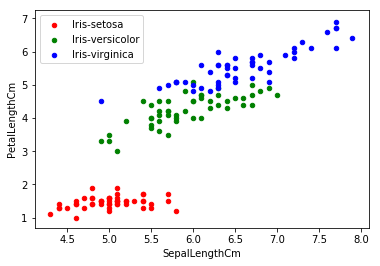

In [9]:
colors = ["red", "green", "blue"]
fig, ax = plt.subplots()

for i, v in enumerate(df.Species.unique()):
    df[df.Species == v][features].plot.scatter(0, 1, color = colors[i], ax = ax, label = v)

Training
accuracy: 0.990476
precision: 0.973684
recall: 1.000000

Test
accuracy: 1.000000
precision: 1.000000
recall: 1.000000
CPU times: user 194 ms, sys: 33.3 ms, total: 227 ms
Wall time: 155 ms


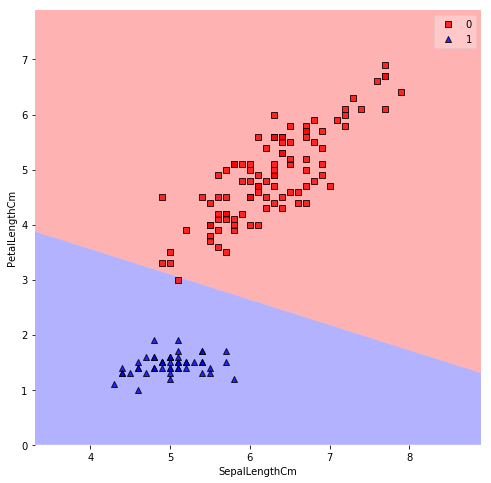

In [19]:
%%time 

target = "Species"
X = df.copy()[features]
y = np.where(df.Species == "Iris-setosa", 1, 0)
#y = preprocessing.LabelEncoder().fit_transform(df[target])

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (8, 8))
plot_decision_regions(X.values, y, pipe)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [15]:
from mlxtend.plotting import plot_decision_regions

Training
accuracy: 0.942857
precision: 0.906250
recall: 0.906250

Test
accuracy: 0.955556
precision: 0.944444
recall: 0.944444
CPU times: user 132 ms, sys: 16.1 ms, total: 149 ms
Wall time: 88.7 ms


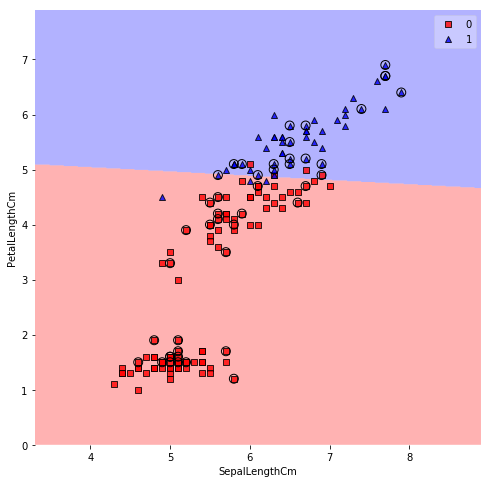

In [22]:
%%time 

target = "Species"
X = df.copy()[features]
y = np.where(df.Species == "Iris-virginica", 1, 0)
#y = preprocessing.LabelEncoder().fit_transform(df[target])

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (8, 8))
plot_decision_regions(X.values, y, pipe, X_highlight= X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Training
accuracy: 0.580952
precision: 0.000000
recall: 0.000000

Test
accuracy: 0.600000
precision: 0.000000
recall: 0.000000
CPU times: user 148 ms, sys: 18 ms, total: 166 ms
Wall time: 97.2 ms


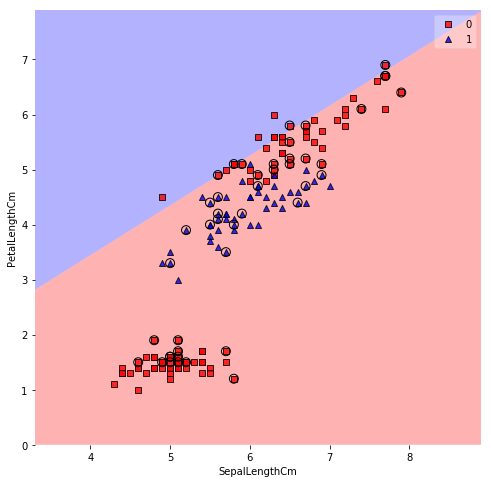

In [23]:
%%time 

target = "Species"
X = df.copy()[features]
y = np.where(df.Species == "Iris-versicolor", 1, 0)
#y = preprocessing.LabelEncoder().fit_transform(df[target])

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (8, 8))
plot_decision_regions(X.values, y, pipe, X_highlight= X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Training
accuracy: 0.961905
precision: 0.921053
recall: 0.972222

Test
accuracy: 0.888889
precision: 0.736842
recall: 1.000000
CPU times: user 528 ms, sys: 135 ms, total: 662 ms
Wall time: 439 ms


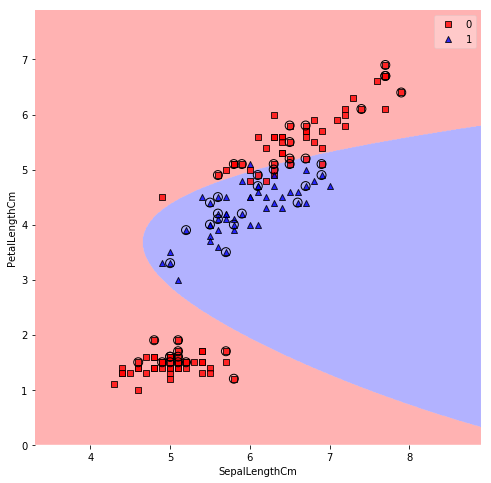

In [27]:
%%time 

target = "Species"
X = df.copy()[features]
y = np.where(df.Species == "Iris-versicolor", 1, 0)
#y = preprocessing.LabelEncoder().fit_transform(df[target])

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=5
                            , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (8, 8))
plot_decision_regions(X.values, y, pipe, X_highlight= X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Training
accuracy: 0.942857
precision: 1.000000
recall: 0.833333

Test
accuracy: 0.977778
precision: 1.000000
recall: 0.928571
CPU times: user 118 ms, sys: 12.9 ms, total: 131 ms
Wall time: 79.8 ms


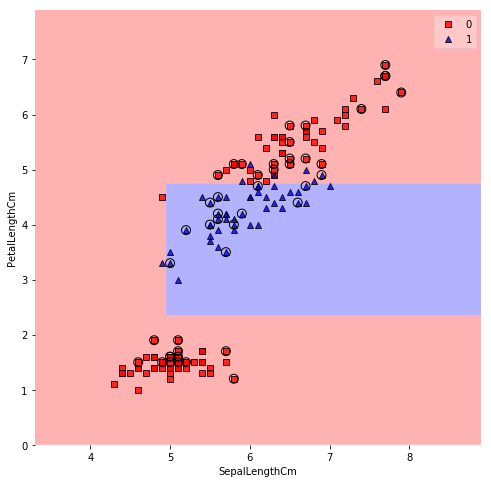

In [33]:
%%time 

target = "Species"
X = df.copy()[features]
y = np.where(df.Species == "Iris-versicolor", 1, 0)
#y = preprocessing.LabelEncoder().fit_transform(df[target])

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=5
    #                        , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3))
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (8, 8))
plot_decision_regions(X.values, y, pipe, X_highlight= X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Training
accuracy: 0.942857
precision: 0.968750
recall: 0.861111

Test
accuracy: 0.977778
precision: 1.000000
recall: 0.928571
CPU times: user 383 ms, sys: 24.1 ms, total: 407 ms
Wall time: 228 ms


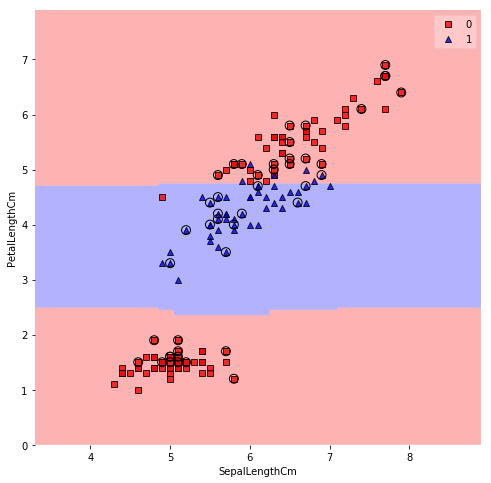

In [38]:
%%time 

target = "Species"
X = df.copy()[features]
y = np.where(df.Species == "Iris-versicolor", 1, 0)
#y = preprocessing.LabelEncoder().fit_transform(df[target])

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=1
    #                        , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_depth=3))
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (8, 8))
plot_decision_regions(X.values, y, pipe, X_highlight= X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Training
accuracy: 0.990476

Test
accuracy: 0.911111
CPU times: user 464 ms, sys: 33.5 ms, total: 498 ms
Wall time: 271 ms


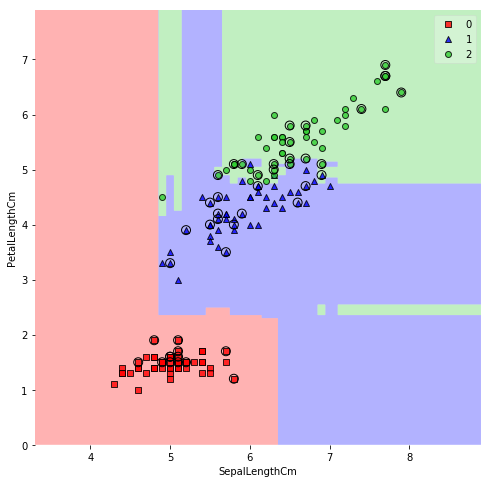

In [42]:
%%time 

target = "Species"
X = df.copy()[features]
y = preprocessing.LabelEncoder().fit_transform(df[target])


# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=1
    #                        , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_depth=6))
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f" % 
(metrics.accuracy_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f" % 
(metrics.accuracy_score(y_test, y_test_pred)))

plt.figure(figsize = (8, 8))
plot_decision_regions(X.values, y, pipe, X_highlight= X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Training
accuracy: 0.980952
precision: 0.981955
recall: 0.980952

Test
accuracy: 0.933333
precision: 0.945098
recall: 0.933333
CPU times: user 643 ms, sys: 67.7 ms, total: 711 ms
Wall time: 379 ms


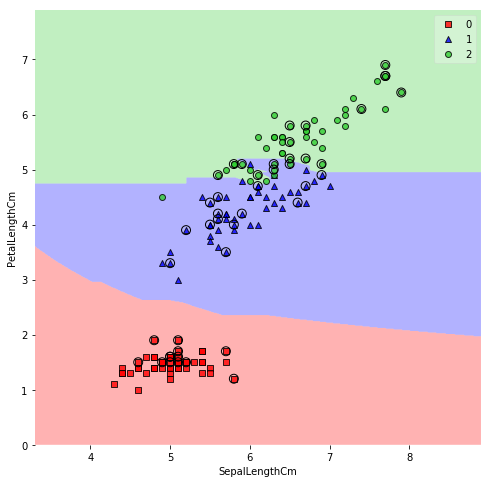

In [47]:
%%time 

target = "Species"
X = df.copy()[features]
y = preprocessing.LabelEncoder().fit_transform(df[target])


# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=3
                            , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_depth=6))
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred, average="weighted"), 
metrics.recall_score(y_train, y_train_pred, average="weighted")))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred, average="weighted"), 
metrics.recall_score(y_test, y_test_pred, average="weighted")))

plt.figure(figsize = (8, 8))
plot_decision_regions(X.values, y, pipe, X_highlight= X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [46]:
metrics.precision_score(y_test, y_test_pred, average="weighted")

0.9792592592592592